# Analysis of trading algorithm
DISCLAIMER: This analysis is done on a quite simple trading algorithm as our value investment algorithm is not yet finished. As a comparison benchmark for the algorithm we used the S&P500, which includes the shares of the 500 largest companies.

This notebook includes the analysis of the first part of our hypothesis. 

Our hypothesis:
A distributed autonomous hedge fund implemented in a blockchain based on smart contracts is (1) able to be more profitable than benchmark indexes and (2) investments follow sustainability criteria that are transparent to the investors.

## Load data into notebook
We are using [zipline](https://github.com/quantopian/zipline) to simulate our trading algorithms. Zipline offers to output the results of the simulation as a pandas pickle file. The advantage of using zipline is that it already calculates common indicators including Sharpe, alpha, beta and the return.

We simulated our simple algorithm for a random period of two months. The period covered is from beginning of October 2013 to end of November 2013.


In [4]:
import pandas as pd
performance = pd.read_pickle('results/momentum_pipeline.pickle')
# display the top 5 rows to see if the load worked
performance.head()

,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,ending_value,...,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return,universe_size
2013-10-07 20:00:00,NaN,0.000000,NaN,-0.008506,NaN,NaN,0.000000,10000000.000000,0.00,0.00,...,0.00,0,NaN,10000000.000000,0.00,0.00,1,[],0.0265,3046
2013-10-08 20:00:00,0.000740,-0.000066,0.036942,-0.020734,0.042944,0.017234,164224.755949,10164224.755949,-164884.07,-164884.07,...,-1111751.72,2,-11.224972,10000000.000000,0.00,0.00,2,"[{'dt': 2013-10-08 20:00:00+00:00, 'order_id':...",0.0266,3046
2013-10-09 20:00:00,0.031015,0.003284,0.758649,-0.020172,0.105230,0.283593,-136252.190979,10027972.564970,4871.72,4871.72,...,-2191421.49,3,456.600448,10164224.755949,-164884.07,-164884.07,3,"[{'dt': 2013-10-09 20:00:00+00:00, 'order_id':...",0.0268,3046
2013-10-10 20:00:00,0.051333,-0.001261,-0.065033,0.001219,0.242613,-0.136551,-753117.984898,9274854.580071,712533.34,712533.34,...,-3758922.04,4,-2.182774,10027972.564970,4871.72,4871.72,4,"[{'dt': 2013-10-10 20:00:00+00:00, 'order_id':...",0.0271,3049
2013-10-11 20:00:00,0.068803,-0.008960,-0.380379,0.007513,0.214236,-0.179221,-1215165.423702,8059689.156369,1850712.22,1850712.22,...,-4379532.24,4,-7.109571,9274854.580071,712533.34,712533.34,5,"[{'dt': 2013-10-11 20:00:00+00:00, 'order_id':...",0.0270,3052


In [5]:
# display the rows that we have in the dataset
for row in performance.columns.values:
    print(row)

algo_volatility
algorithm_period_return
alpha
benchmark_period_return
benchmark_volatility
beta
capital_used
ending_cash
ending_exposure
ending_value
excess_return
gross_leverage
information
long_exposure
long_value
longs_count
max_drawdown
max_leverage
net_leverage
orders
period_close
period_label
period_open
pnl
portfolio_value
positions
returns
sharpe
short_exposure
short_value
shorts_count
sortino
starting_cash
starting_exposure
starting_value
trading_days
transactions
treasury_period_return
universe_size


## Variables
Based on our algorithm assets are traded on the stock market. The algorithm works as follows: A simple algorithm that longs the top 3 stocks by Relative Strength Index (RSI) and shorts the bottom 3 each day. The idea of RSI is to give an indicator of overbought (i.e. overvalued) and oversold (i.e. undervalued) assets. Thus, we have the independent variable RSI, which influences the derivatives we are trading. Furthermore, the derivatives are evaluated based on other trades, which we will not consider in this analysis. The trading strategy itself is in itself a quite complex variable, as it will influence any performance measurement.

The following dependent variables will be analysed:

1. Return of the fund as daily intervals: 
   Determine overall profit/loss, mean profit/loss per time interval (week/month) and outliers of profit and loss
   
2. Sharpe ratio of the fund as daily intervals: 
   Determine overall Sharpe ratio (performance as compared to its risk), mean Sharpe ratio per time interval (week/month) and outliers
   
3. Beta of the fund as daily intervals: 
   Measure historical volatility in comparison to S&P500 index 
   
4. Alpha of the fund as daily intervals: 
   Measure historical return on investment compared to its Sharpe ratio (risk adjusted expected return)

### Return of the fund
The return of the fund is influenced by how well the strategy is able to determine assets that are increasing (for long) or decreasing (for short) in value over time.

In the figure below we are printing the algorithm relative return compared to our S&P500 benchmark.

Populating the interactive namespace from numpy and matplotlib


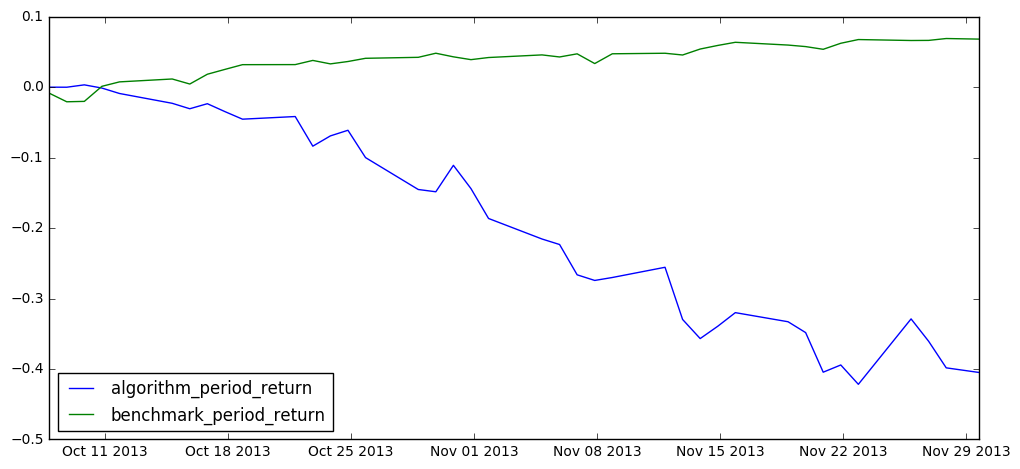

In [6]:
%pylab inline
figsize(12, 12)
import matplotlib.pyplot as plt

fig = plt.figure()
return_graph1 = fig.add_subplot(211)
algo_performance = plt.plot(performance.algorithm_period_return)
bench_performance = plt.plot(performance.benchmark_period_return)
plt.legend(loc=0)
plt.show()

As we can see our algorithm does not outperform the benchmark. Thus, let us take a deeper look into our distribution of long and short values in the portfolio and our overall return.

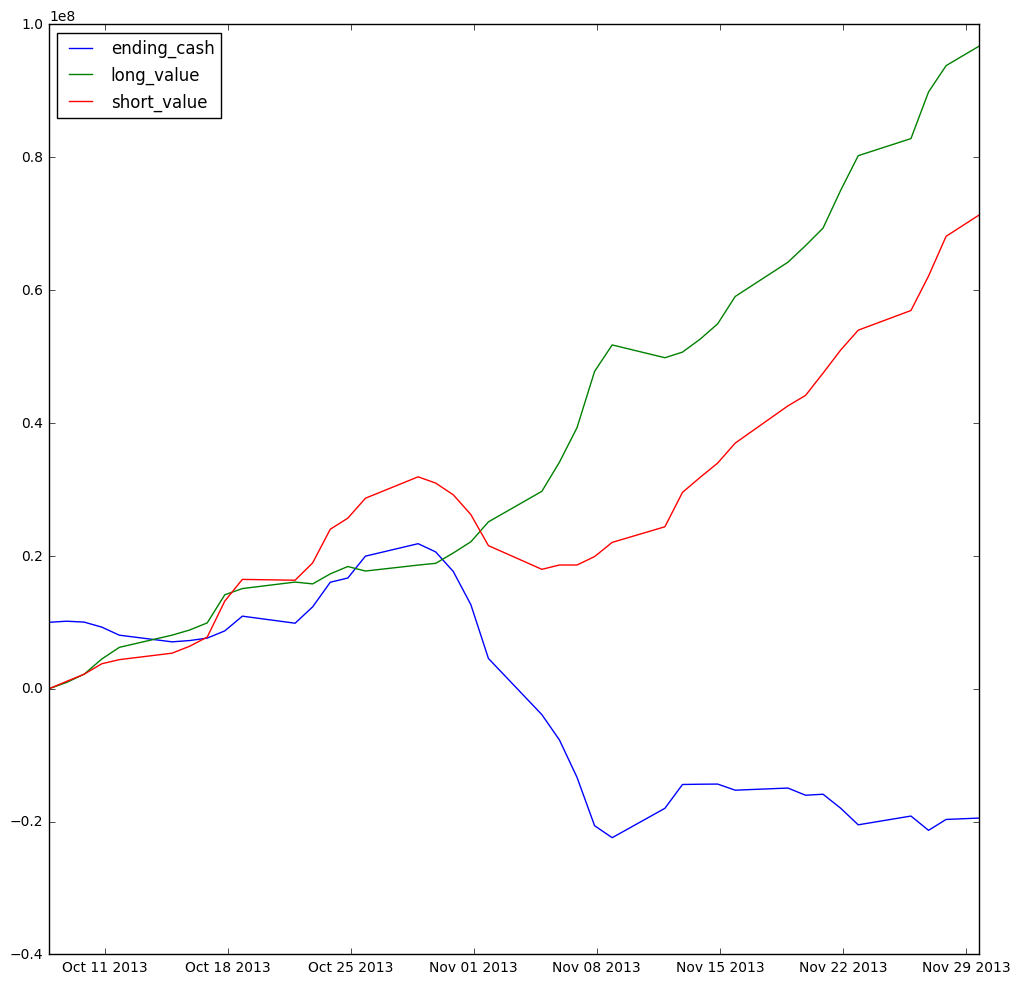

In [7]:
return_graph2 = fig.add_subplot(212)
algo_return = plt.plot(performance.ending_cash)
algo_long = plt.plot(performance.long_value)
# Take inverse of short value for comparison (by default short is always negative)
algo_short = plt.plot(-performance.short_value)
plt.legend(loc=0)
plt.show()

As we can see from the above figure, our algorithm performs quite well at the beginning. Around mid of October we see that the value which is bound in short investments starts to increase faster then our long investments. From the benchmark in the previous figure we have seen that the overall market increases. However, the algorithm holds primarily values that predict a decreasing market. As a first result, the RSI seems not to be a very well predictor of the actual value and the market behaviour. As we ran the simulation only for 2 months, this might only be true for that period of time. In a next step, we would need to analyse it over a longer period of time and go into depths of how RSI is calculated. Since we do not use RSI in our final algorithm, we will exclude this analysis here.

### Sharpe ratio
With the Sharpe ratio we can determine the return in respect to the risk involved. The Sharpe ratio is calculated by dividing the sum of the asset return and a benchmark return (S&P500 in our case) by the standard deviation of the asset return. The higher the Sharpe ratio, the higher the return with the same risk or the lower the risk with same return.

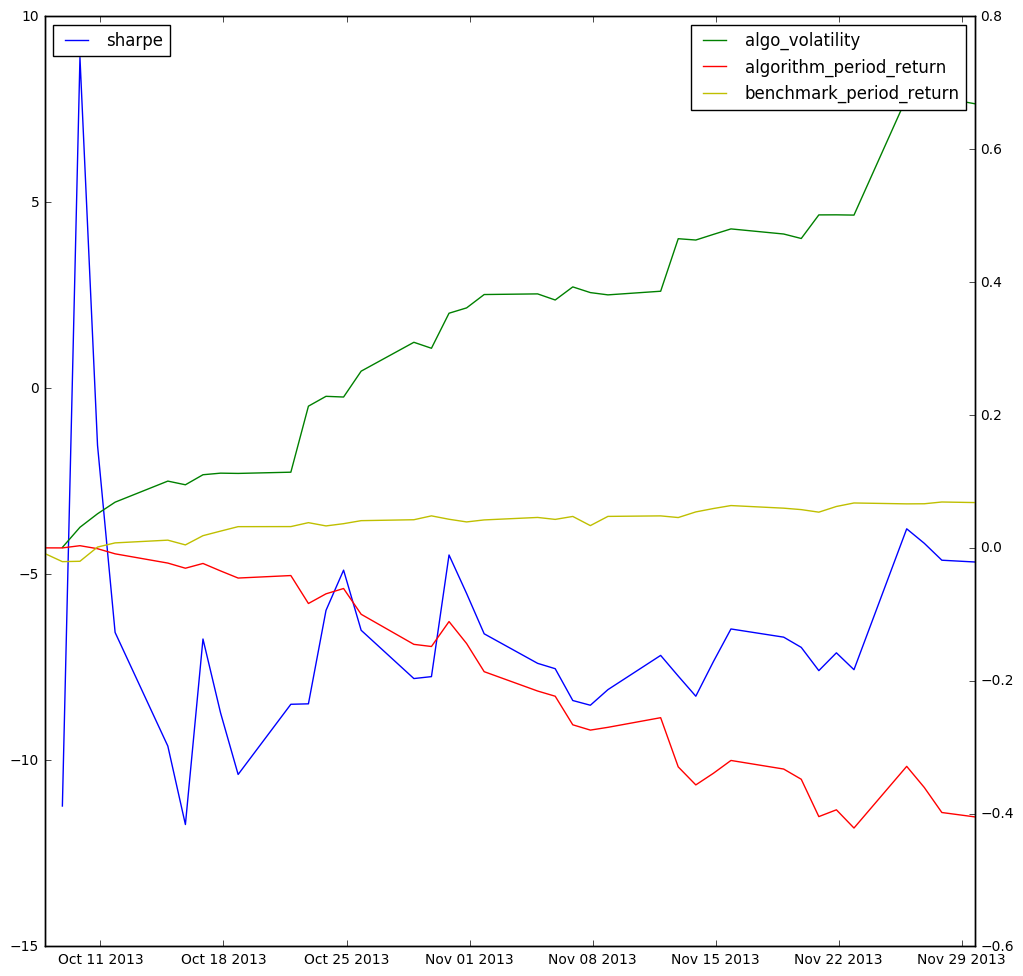

In [8]:
return_graph3, ax1 = plt.subplots()
ax1.plot(performance.sharpe, 'b')
plt.legend(loc=2)
ax2 = ax1.twinx()
ax2.plot(performance.algo_volatility, 'g')
ax2.plot(performance.algorithm_period_return, 'r')
ax2.plot(performance.benchmark_period_return, 'y')
plt.legend(loc=1)
plt.show()

From the above figure we see the Sharpe ratio as well as the three components the ratio is calculated from: algo_volatility (the standard deviation of asset return), algorithm_period_return and benchmark_period_return. Our algorithm performs quite poorly in terms of Sharpe ratio as overall performance is worse than the benchmark and the volatility of the return increases over time due to our losses.

### Alpha and Beta
The alpha value expresses the performance of the fund in comparison to a benchmark. Typically a higher alpha indicates a higher profitability in comparison to the benchmark. An alpha of zero means exact performance as the benchmark, a positive value indicates outperforming the benchmark and a negative value represents falling behind the benchmark.

The beta value shows the volatility of the fund in comparison to a benchmark. The beta value baseline is one and represents the same volatility as the benchmark. A value below one indicates a lower volatility and consequently a value above one a higher volatility than the benchmark.

<function matplotlib.pyplot.show>

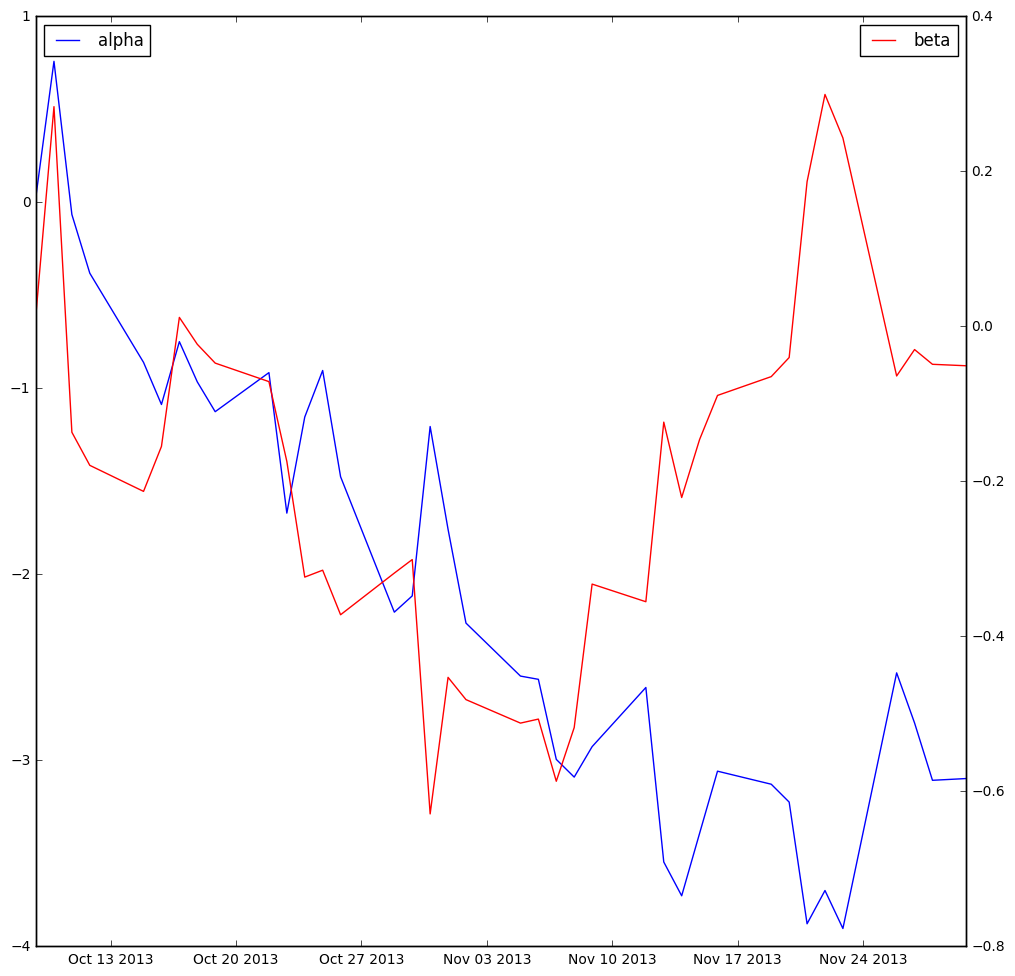

In [9]:
alpha_graph, ax1 = plt.subplots()
ax1.plot(performance.alpha, 'b')
plt.legend(loc=2)
ax2 = ax1.twinx()
ax2.plot(performance.beta, 'r')
plt.legend(loc=1)
plt.show

The figure above shows that the alpha value is decreasing overtime and confirms our observations earlier: our algorithm performs quite poorly in comparison to the S&P500.

Our beta value stays for the whole period below one, which means that our algorithm could be independent from the market. However, as it drops below zero the beta indicates that the algorithm reacts exactly opposite to the overall market.

## Time-based Performance
Lastly, we want to analyse our performance over time in terms of weekly and monthly results. Therefore our above mentioned indicators including return, Sharpe ratio, alpha and beta are put into a timely perspective.

In [71]:
monthly_returns = performance.returns.resample('M', how='mean')
weekly_returns = performance.returns.resample('W', how='mean')
# replace NaN values for plotting with default return (0)
daily_returns = performance.returns.fillna(value=0)
print('Monthly')
print(monthly_returns)
print('\nWeekly')
print(weekly_returns)
print('\nDaily')
print(daily_returns)

Monthly
2013-10-31   -0.007902
2013-11-30   -0.016631
Freq: M, Name: returns, dtype: float64

Weekly
2013-10-13   -0.001791
2013-10-20   -0.007440
2013-10-27   -0.011356
2013-11-03   -0.019341
2013-11-10   -0.021259
2013-11-17   -0.012731
2013-11-24   -0.031288
2013-12-01    0.010819
Freq: W-SUN, Name: returns, dtype: float64

Daily
2013-10-07 20:00:00    0.000000
2013-10-08 20:00:00   -0.000066
2013-10-09 20:00:00    0.003351
2013-10-10 20:00:00   -0.004531
2013-10-11 20:00:00   -0.007708
2013-10-14 20:00:00   -0.014056
2013-10-15 20:00:00   -0.007917
2013-10-16 20:00:00    0.007385
2013-10-17 20:00:00   -0.011490
2013-10-18 20:00:00   -0.011122
2013-10-21 20:00:00    0.003932
2013-10-22 20:00:00   -0.043902
2013-10-23 20:00:00    0.015909
2013-10-24 20:00:00    0.008591
2013-10-25 20:00:00   -0.041307
2013-10-28 20:00:00   -0.050311
2013-10-29 20:00:00   -0.003790
2013-10-30 20:00:00    0.044078
2013-10-31 20:00:00   -0.037182
2013-11-01 20:00:00   -0.049498
2013-11-04 21:00:00   -0.

In [75]:
monthly_sharpe = performance.sharpe.resample('M', how='mean')
weekly_sharpe = performance.sharpe.resample('W', how='mean')
# drop NaN values for plotting
daily_sharpe = performance.sharpe.dropna()
print('Monthly')
print(monthly_sharpe)
print('\nWeekly')
print(weekly_sharpe)
print('\nDaily')
print(daily_sharpe)

Monthly
2013-10-31   -6.524520
2013-11-30   -6.831513
Freq: M, Name: sharpe, dtype: float64

Weekly
2013-10-13   -2.604415
2013-10-20   -9.433989
2013-10-27   -6.863926
2013-11-03   -6.425953
2013-11-10   -7.985021
2013-11-17   -7.398248
2013-11-24   -7.179844
2013-12-01   -4.304766
Freq: W-SUN, Name: sharpe, dtype: float64

Daily
2013-10-08 20:00:00   -11.224972
2013-10-09 20:00:00     8.895998
2013-10-10 20:00:00    -1.529314
2013-10-11 20:00:00    -6.559372
2013-10-14 20:00:00    -9.613949
2013-10-15 20:00:00   -11.722511
2013-10-16 20:00:00    -6.735743
2013-10-17 20:00:00    -8.720800
2013-10-18 20:00:00   -10.376940
2013-10-21 20:00:00    -8.490046
2013-10-22 20:00:00    -8.478192
2013-10-23 20:00:00    -5.966185
2013-10-24 20:00:00    -4.884706
2013-10-25 20:00:00    -6.500502
2013-10-28 20:00:00    -7.798674
2013-10-29 20:00:00    -7.746724
2013-10-30 20:00:00    -4.476773
2013-10-31 20:00:00    -5.511956
2013-11-01 20:00:00    -6.595637
2013-11-04 21:00:00    -7.389724
2013-11

In [76]:
monthly_alpha = performance.alpha.resample('M', how='mean')
weekly_alpha = performance.alpha.resample('W', how='mean')
# drop NaN values for plotting
daily_alpha = performance.alpha.dropna()
print('Monthly')
print(monthly_alpha)
print('\nWeekly')
print(weekly_alpha)
print('\nDaily')
print(daily_alpha)

Monthly
2013-10-31   -0.990603
2013-11-30   -3.103839
Freq: M, Name: alpha, dtype: float64

Weekly
2013-10-13    0.087545
2013-10-20   -0.956792
2013-10-27   -1.223401
2013-11-03   -1.908321
2013-11-10   -2.824007
2013-11-17   -3.266186
2013-11-24   -3.566527
2013-12-01   -2.882911
Freq: W-SUN, Name: alpha, dtype: float64

Daily
2013-10-08 20:00:00    0.036942
2013-10-09 20:00:00    0.758649
2013-10-10 20:00:00   -0.065033
2013-10-11 20:00:00   -0.380379
2013-10-14 20:00:00   -0.859815
2013-10-15 20:00:00   -1.086251
2013-10-16 20:00:00   -0.748424
2013-10-17 20:00:00   -0.964517
2013-10-18 20:00:00   -1.124954
2013-10-21 20:00:00   -0.914962
2013-10-22 20:00:00   -1.670275
2013-10-23 20:00:00   -1.153664
2013-10-24 20:00:00   -0.903466
2013-10-25 20:00:00   -1.474639
2013-10-28 20:00:00   -2.202693
2013-10-29 20:00:00   -2.115291
2013-10-30 20:00:00   -1.204656
2013-10-31 20:00:00   -1.757429
2013-11-01 20:00:00   -2.261536
2013-11-04 21:00:00   -2.546405
2013-11-05 21:00:00   -2.5638

In [77]:
monthly_beta = performance.beta.resample('M', how='mean')
weekly_beta = performance.beta.resample('W', how='mean')
# drop NaN values for plotting
daily_beta = performance.beta.dropna()
print('Monthly')
print(monthly_beta)
print('\nWeekly')
print(weekly_beta)
print('\nDaily')
print(daily_beta)

Monthly
2013-10-31   -0.188746
2013-11-30   -0.171997
Freq: M, Name: beta, dtype: float64

Weekly
2013-10-13   -0.003736
2013-10-20   -0.085261
2013-10-27   -0.251068
2013-11-03   -0.436469
2013-11-10   -0.491068
2013-11-17   -0.186860
2013-11-24    0.124898
2013-12-01   -0.048320
Freq: W-SUN, Name: beta, dtype: float64

Daily
2013-10-08 20:00:00    0.017234
2013-10-09 20:00:00    0.283593
2013-10-10 20:00:00   -0.136551
2013-10-11 20:00:00   -0.179221
2013-10-14 20:00:00   -0.212828
2013-10-15 20:00:00   -0.154850
2013-10-16 20:00:00    0.011665
2013-10-17 20:00:00   -0.022990
2013-10-18 20:00:00   -0.047300
2013-10-21 20:00:00   -0.071181
2013-10-22 20:00:00   -0.174213
2013-10-23 20:00:00   -0.323420
2013-10-24 20:00:00   -0.314524
2013-10-25 20:00:00   -0.371999
2013-10-28 20:00:00   -0.318256
2013-10-29 20:00:00   -0.300793
2013-10-30 20:00:00   -0.628982
2013-10-31 20:00:00   -0.452803
2013-11-01 20:00:00   -0.481513
2013-11-04 21:00:00   -0.511828
2013-11-05 21:00:00   -0.506633

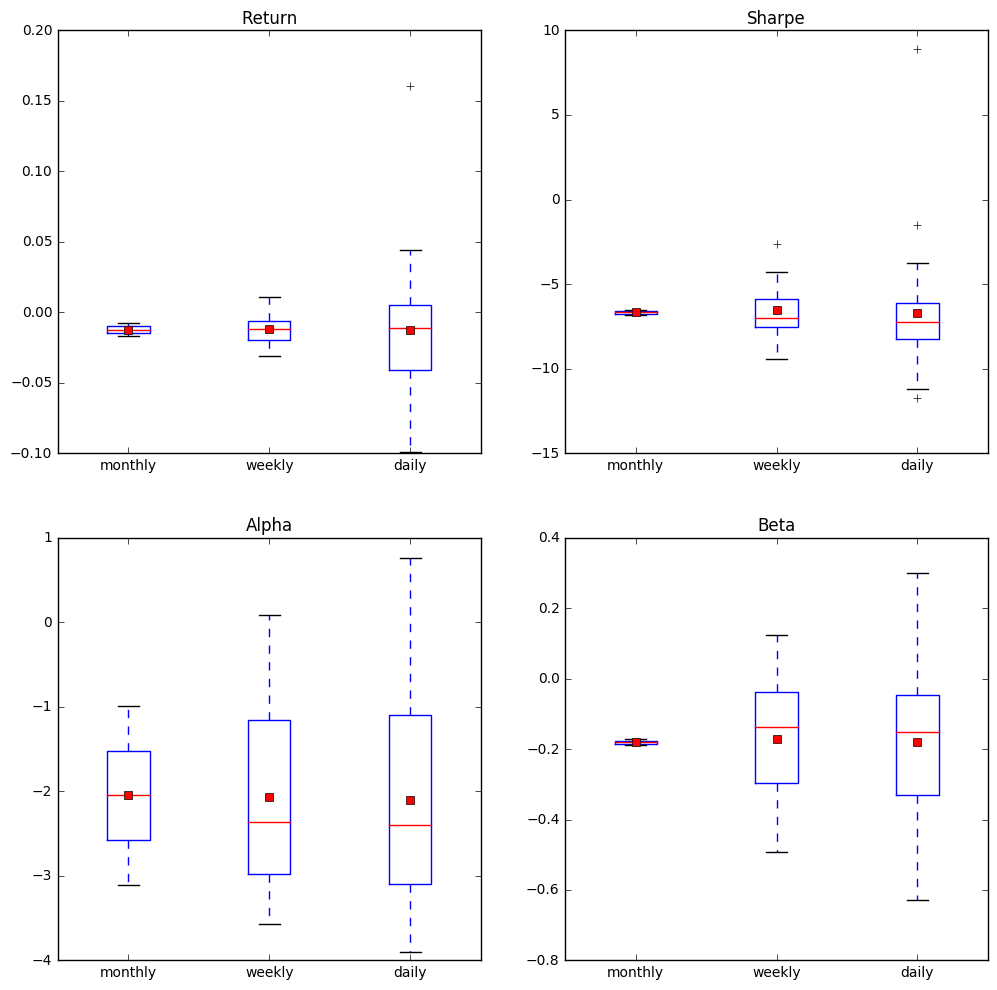

In [80]:
fig, axes = plt.subplots(nrows=2, ncols=2)
labels = ['monthly', 'weekly', 'daily']
axes[0, 0].boxplot((monthly_returns, weekly_returns, daily_returns), labels=labels, showmeans=True)
axes[0, 0].set_title('Return')
axes[0, 1].boxplot((monthly_sharpe, weekly_sharpe, daily_sharpe), labels=labels, showmeans=True)
axes[0, 1].set_title('Sharpe')
axes[1, 0].boxplot((monthly_alpha, weekly_alpha, daily_alpha), labels=labels, showmeans=True)
axes[1, 0].set_title('Alpha')
axes[1, 1].boxplot((monthly_beta, weekly_beta, daily_beta), labels=labels, showmeans=True)
axes[1, 1].set_title('Beta')
plt.setp(axes)
plt.show()

Generally the standard deviation of our measurements increases when we go from monthly, to weekly and then to a daily view. This is primarily caused by having more data points the finer the date granularity. However, with the Sharpe ratio it is quite interesting to see, that the weekly and daily standard devition stays quite similar.

In [86]:
from statistics import stdev
print('Standard deviation\nWeekly Sharpe: {}\nDaily: Sharpe {}'.format(stdev(weekly_sharpe), stdev(daily_sharpe)))

Standard deviation
Weekly Sharpe: 2.1451061476445545
Daily: Sharpe 3.285653294106114


The other measurements are less interseting and more data would be required to give a better view on their behaviour in relation to the time perspective. Especially, since the return of the algorithm more or less constantly falls behind the benchmark, the monthly indicators give a quite good representation of the overall trend. Simulating the algorithm for a year or more would however increase their meaning.